# Evaluation of Training Data Size and Class Imbalance

### Set up - Imports and data preprocessing

In [1]:
# Import statements
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import time

import data_processing as dp 
import model_selection as ms 
import model_files as fm
import graph_production as gp

from scapy.all import *

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
import statistics as s




#### Setup

In [3]:
trainFile = rdpcap('data/timestamps/training45m.pcapng')
labelFile = fm.toList('data/timestamps/training45mClassEDITED.txt') # generate target list

cleanTestFile = rdpcap('data/timestamps/cleanTest.pcapng')
cleanTestLabelFile = fm.toList('data/timestamps/cleanTestClass.txt')

testFile = rdpcap('data/timestamps/anomaliesTest.pcapng')
testLabelFile = fm.toList('data/timestamps/anomaliesTestClass.txt')

In [4]:
gen_times = []

s = time.process_time()
x60s, y60s = dp.timestamps(trainFile, labelFile, 60)
gen_times.append(time.process_time() - s)
s = time.process_time()

x45s, y45s = dp.timestamps(trainFile, labelFile, 45)
gen_times.append(time.process_time() - s)
s = time.process_time()

x30s, y30s = dp.timestamps(trainFile, labelFile, 30)
gen_times.append(time.process_time() - s)
s = time.process_time()

x15s, y15s = dp.timestamps(trainFile, labelFile, 15)
gen_times.append(time.process_time() - s)
s = time.process_time()

x10s, y10s = dp.timestamps(trainFile, labelFile, 10)
gen_times.append(time.process_time() - s)
s = time.process_time()

x5s, y5s = dp.timestamps(trainFile, labelFile, 5)
gen_times.append(time.process_time() - s)
s = time.process_time()

x2s, y2s = dp.timestamps(trainFile, labelFile, 2)
gen_times.append(time.process_time() - s)
s = time.process_time()

x1s, y1s = dp.timestamps(trainFile, labelFile, 1)
gen_times.append(time.process_time() - s)
s = time.process_time()

xhalfs, yhalfs = dp.timestamps(trainFile, labelFile, 0.5)
gen_times.append(time.process_time() - s)
s = time.process_time()

151535
151535
151535
151535
151535
151535
151535
151535
151535


## Plot 1 - Time to generate feature sets

[1, 2, 3, 4, 5, 6, 7, 8, 9]


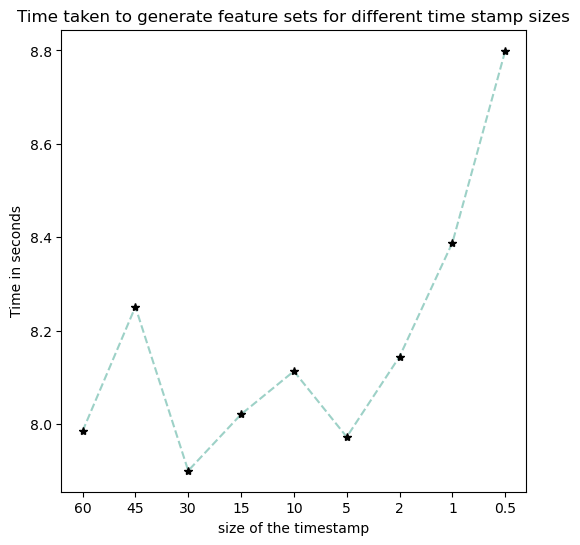

In [5]:
size_times = [60, 45, 30, 15, 10, 5, 2, 1, 0.5]
x_axis = np.arange(1, len(size_times)+1).tolist()
print(x_axis)
fig = plt.figure(figsize=(6, 6))
# Create an axes object
ax = plt.axes()
# Plotting the figure
plt.plot(x_axis, gen_times, color="#9DD1C7", ls='--', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
# Defining the label along the x-axis
plt.xlabel("size of the timestamp")
# Defining the label along the y-axis
plt.ylabel("Time in seconds")
# Defining the title of the plot
plt.title("Time taken to generate feature sets for different time stamp sizes")
plt.xticks(x_axis, size_times)
# Displaying the plot
plt.show()

In [6]:
labels = [y60s, y45s, y30s, y15s, y10s, y5s, y2s, y1s, yhalfs]

x_data = [x60s, x45s, x30s, x15s, x10s, x5s, x2s, x1s, xhalfs]

In [8]:
from mycolorpy import colorlist as mcp

color1=mcp.gen_color(cmap="gnuplot2",n=12)
print(color1)

['#000000', '#00005c', '#0000b8', '#1000ff', '#5b00ff', '#a312ed', '#eb40bf', '#ff6e91', '#ff9e61', '#ffcc33', '#fffa05', '#ffffff']


#### Test Data for evaluation

In [8]:

clx60, cly60  = dp.timestamps(cleanTestFile, cleanTestLabelFile, 60)
clx30, cly30  = dp.timestamps(cleanTestFile, cleanTestLabelFile, 30)
clx10, cly10  = dp.timestamps(cleanTestFile, cleanTestLabelFile, 10)
clx5, cly5  = dp.timestamps(cleanTestFile, cleanTestLabelFile,5)


atx60, aty60  = dp.timestamps(testFile, testLabelFile, 60)
atx30, aty30  = dp.timestamps(testFile, testLabelFile, 30)
atx10, aty10  = dp.timestamps(testFile, testLabelFile, 10)
atx5, aty5  = dp.timestamps(testFile, testLabelFile,5)

17950
17950
17950
17950
13224
13224
13224
13224


### Plot 2 - Class imbalance for timestamps

In [9]:
normal = []
abnormal = []
for item in labels:
	n, a = gp.class_balance_binary(item)
	normal.append(n)
	abnormal.append(a)

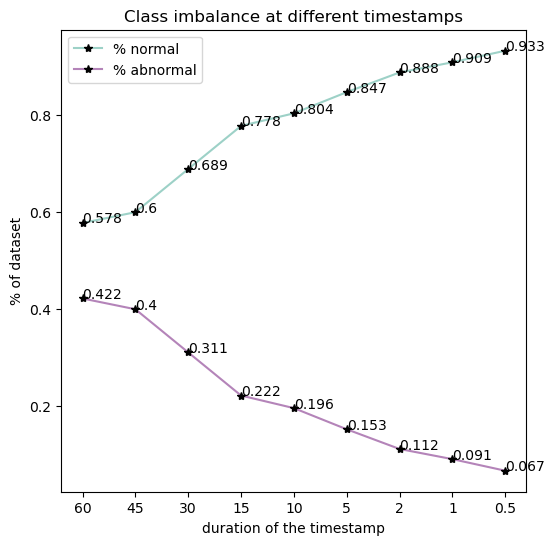

In [9]:

fig = plt.figure(figsize=(6,6))
# Create an axes object
ax = plt.axes()
# Plotting the figure
plt.plot(x_axis, normal, label='% normal', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
plt.plot(x_axis, abnormal, label='% abnormal', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
# Defining the label along the x-axis
plt.xlabel("duration of the timestamp")
# Defining the label along the y-axis
plt.ylabel("% of dataset")
# Defining the title of the plot
plt.title("Class imbalance at different timestamps")

n, a = [], []

for i in range(len(normal)):
	n.append(round(normal[i], 3))
	
	a.append(round(abnormal[i], 3))

normal = n
abnormal = a

for i in range(len(normal)):
	ax.text(x_axis[i], normal[i], normal[i], size=10)
	ax.text(x_axis[i], abnormal[i], abnormal[i], size=10)
#plt.xticks(size_times, rotation=45)
plt.xticks(x_axis, size_times)
ax.legend()
# Displaying the plot
plt.show()

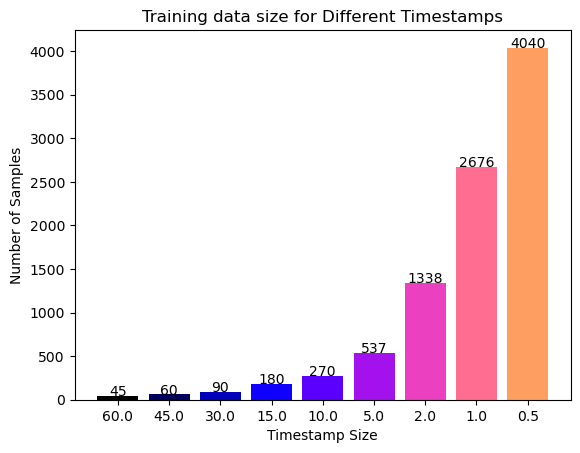

In [10]:
training_size = []


for x in x_data:
	training_size.append(len(x))

def addlabels(x,y):
    for i in range(0, 9):
        plt.text(i+1, y[i], y[i], ha = 'center')

plt.bar(x_axis, training_size, color=color1, tick_label=size_times)

plt.xlabel('Timestamp Size')
plt.ylabel('Number of Samples')
plt.title("Training data size for Different Timestamps")
addlabels(x_axis, training_size)
fig.tight_layout()

## Performance at time stamps - Decision Tree

> for the purpose of this evaluation 2 models are considered to compare performance. This will encompass a range of different model methods


In [11]:
import json
def generatePipeline():
	pipelines = []
	#pipelines.append(('SGDC', (Pipeline([('SGDC', SGDClassifier())]))))
	pipelines.append(('DecisionTree', (Pipeline([('DecisionTree', DecisionTreeClassifier())]))))
	return(pipelines)

def trainModels(X,Y,k=5):
	pipelines = generatePipeline()
	models = []
	results = []
	names = []

	for pipe, model in pipelines:
		filecomposed = 'model_parameters/' + str(pipe)  + '.json'
		print(filecomposed + '\n\n')
		if os.path.isfile(filecomposed):
			f = open(filecomposed)
			print('opened file')
			params = json.load(f)
			print('loaded parameters')
			f.close()

			clf = RandomizedSearchCV(estimator=model, param_distributions=params, cv=k)
			search = clf.fit(X, Y)
			kfold = KFold(n_splits=k)
		
			crossv_results =  cross_validate(search.best_estimator_, X, Y, cv=kfold, scoring=['balanced_accuracy',
						 'f1', 'precision', 'recall'])

			results.append(crossv_results)
			models.append(search.best_estimator_)
		
	return(results, models, names)


for i in range(len(x_data)):
	x = x_data[i]
	y = labels[i]
	size = size_times[i]
	
	r, p, n = trainModels(x, y)
	results.append(r)
	pipelines.append(p)

model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded par

Text(0.02, 0.5, 'F1 Score')

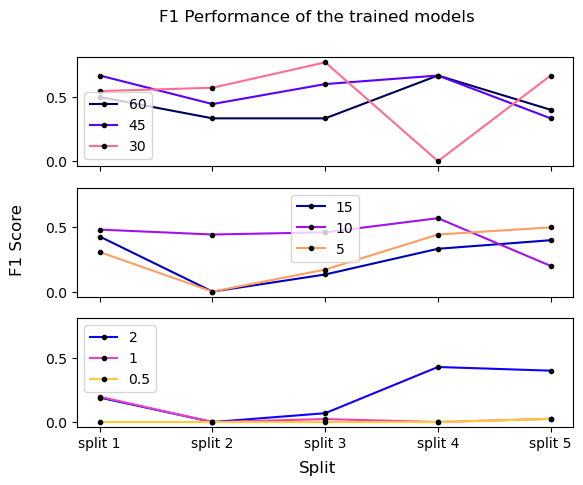

In [12]:
f1s = []
for result in results:
	f1s.append(result[0]['test_f1'])

x =  [1, 2, 3, 4, 5]
xLabels = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5']

fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].plot(x, f1s[0], color=color1[1], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].legend(size_times[:3])
axs[1].legend(size_times[3:6])
axs[2].legend(size_times[6:])
plt.xticks(x, xLabels)

fig.suptitle('F1 Performance of the trained models')
fig.supxlabel("Split")
fig.supylabel("F1 Score")

Text(0.02, 0.5, 'Balanced Accuracy')

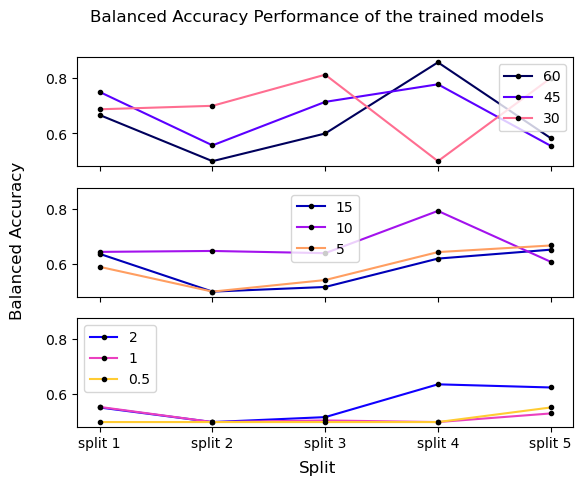

In [13]:
f1s = []
for result in results:
	f1s.append(result[0]['test_balanced_accuracy'])

x =  [1, 2, 3, 4, 5]
xLabels = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5']

fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].plot(x, f1s[0], color=color1[1], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].legend(size_times[:3])
axs[1].legend(size_times[3:6])
axs[2].legend(size_times[6:])
plt.xticks(x, xLabels)

fig.suptitle('Balanced Accuracy Performance of the trained models')
fig.supxlabel("Split")
fig.supylabel("Balanced Accuracy")

##### Evaluation on unseen data

1.0


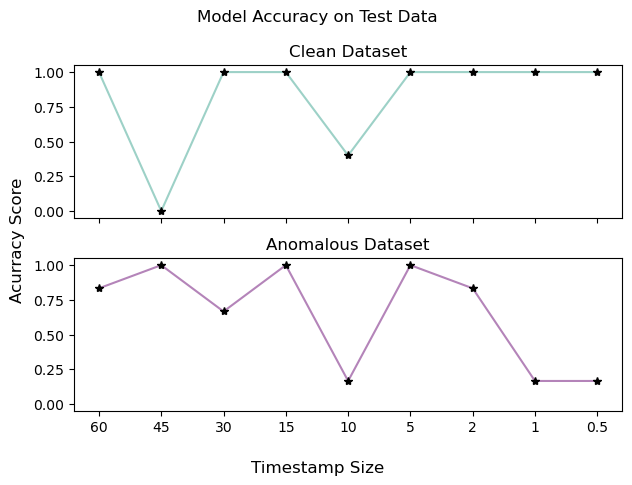

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cleanScoresDT = []
anomalyScoresDT = []

for model in pipelines:
		ypredClean = model[0].predict(clx60)
		ypredAnomaly = model[0].predict(atx60)

		cleanScoresDT.append(accuracy_score(cly60, ypredClean))
		anomalyScoresDT.append(accuracy_score(aty60, ypredAnomaly))

print(cleanScoresDT[0])

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Model Accuracy on Test Data')
axs[0].plot(x_axis, cleanScoresDT, label='clean test data', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
axs[1].plot(x_axis, anomalyScoresDT, label='abnormal test data', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)

fig.supxlabel('Timestamp Size')
fig.supylabel('Acurracy Score')
# Defining the title of the plot
axs[0].set_title("Clean Dataset")
axs[1].set_title('Anomalous Dataset')

plt.xticks(x_axis, size_times)

fig.tight_layout()
# Displaying the plot
plt.show()


## Pipeline: SGDC

model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
model_parameters/SGDC.json


opened file
loaded parameters
1.0


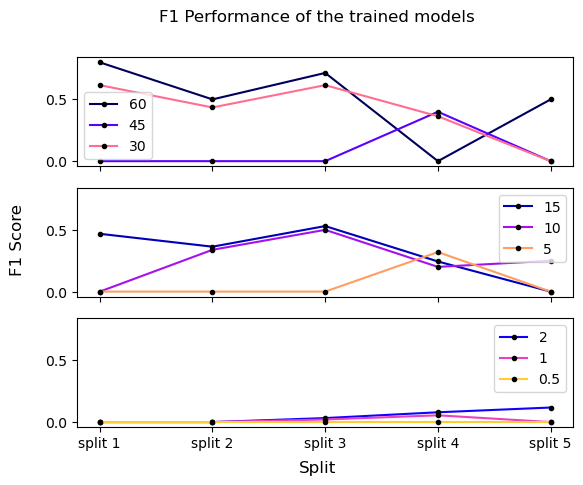

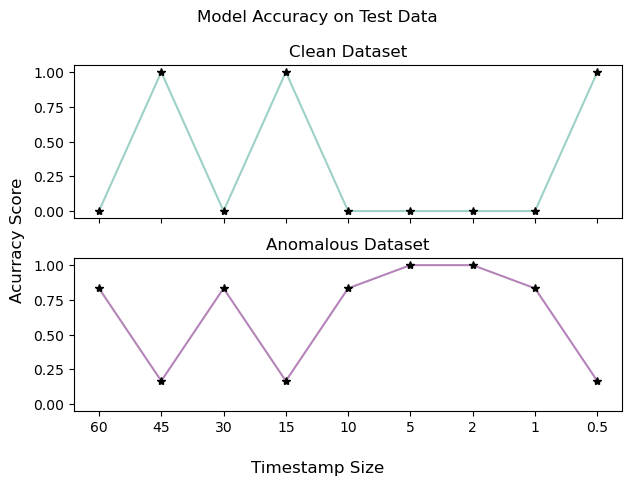

In [22]:
results = []
pipelines = []

def generatePipeline():
	pipelines = []
	pipelines.append(('SGDC', (Pipeline([('SGDC', SGDClassifier())]))))
	return(pipelines)

results = []
pipelines = []


for i in range(len(x_data)):
	x = x_data[i]
	y = labels[i]
	size = size_times[i]
	
	r, p, n = trainModels(x, y)
	results.append(r)
	pipelines.append(p)
	
f1s = []
for result in results:
	f1s.append(result[0]['test_f1'])

x =  [1, 2, 3, 4, 5]
xLabels = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5']

fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].plot(x, f1s[0], color=color1[1], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].legend(size_times[:3])
axs[1].legend(size_times[3:6])
axs[2].legend(size_times[6:])
plt.xticks(x, xLabels)

fig.suptitle('F1 Performance of the trained models')
fig.supxlabel("Split")
fig.supylabel("F1 Score")


cleanScores = []
anomalyScores = []

for model in pipelines:
		ypredClean = model[0].predict(clx60)
		ypredAnomaly = model[0].predict(atx60)

		cleanScores.append(accuracy_score(cly60, ypredClean))
		anomalyScores.append(accuracy_score(aty60, ypredAnomaly))

print(cleanScoresDT[0])

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Model Accuracy on Test Data')
axs[0].plot(x_axis, cleanScores, label='clean test data', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
axs[1].plot(x_axis, anomalyScores, label='abnormal test data', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)

fig.supxlabel('Timestamp Size')
fig.supylabel('Acurracy Score')
# Defining the title of the plot
axs[0].set_title("Clean Dataset")
axs[1].set_title('Anomalous Dataset')

plt.xticks(x_axis, size_times)

fig.tight_layout()
# Displaying the plot
plt.show()

## Pipeline: Random Forest

model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
model_parameters/RandomForest.json


opened file
loaded parameters
1.0


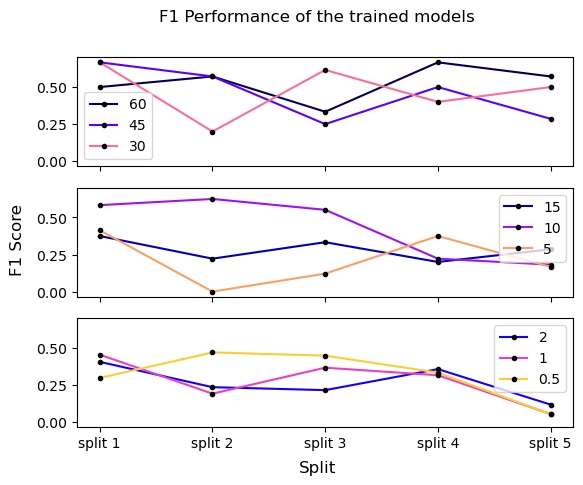

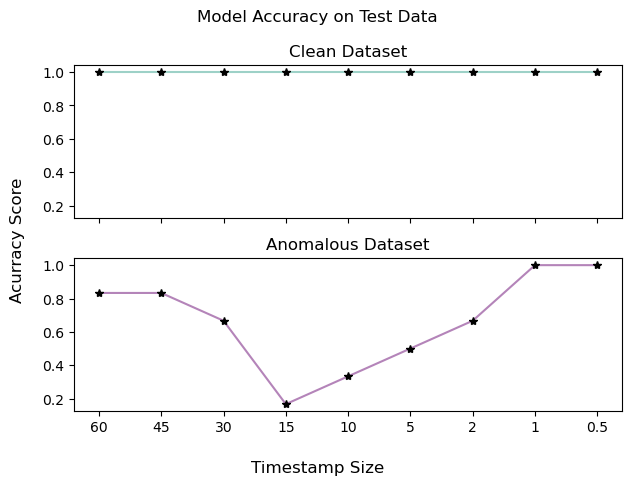

In [23]:
'''from sklearn.ensemble import RandomForestClassifier

results = []
pipelines = []

def generatePipeline():
	pipelines = []
	pipelines.append(('RandomForest', (Pipeline([('RandomForest', RandomForestClassifier())]))))
	return(pipelines)

results = []
pipelines = []


for i in range(len(x_data)):
	x = x_data[i]
	y = labels[i]
	size = size_times[i]
	
	r, p, n = trainModels(x, y)
	results.append(r)
	pipelines.append(p)
	
f1s = []
for result in results:
	f1s.append(result[0]['test_f1'])

x =  [1, 2, 3, 4, 5]
xLabels = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5']

fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].plot(x, f1s[0], color=color1[1], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].legend(size_times[:3])
axs[1].legend(size_times[3:6])
axs[2].legend(size_times[6:])
plt.xticks(x, xLabels)

fig.suptitle('F1 Performance of the trained models')
fig.supxlabel("Split")
fig.supylabel("F1 Score")


cleanScores = []
anomalyScores = []

for model in pipelines:
		ypredClean = model[0].predict(clx60)
		ypredAnomaly = model[0].predict(atx60)

		cleanScores.append(accuracy_score(cly60, ypredClean))
		anomalyScores.append(accuracy_score(aty60, ypredAnomaly))

print(cleanScoresDT[0])

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Model Accuracy on Test Data')
axs[0].plot(x_axis, cleanScores, label='clean test data', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
axs[1].plot(x_axis, anomalyScores, label='abnormal test data', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)

fig.supxlabel('Timestamp Size')
fig.supylabel('Acurracy Score')
# Defining the title of the plot
axs[0].set_title("Clean Dataset")
axs[1].set_title('Anomalous Dataset')

plt.xticks(x_axis, size_times)

fig.tight_layout()
# Displaying the plot
plt.show()'''

## Pipeline: Gaussian

model_parameters/Gaussian.json


opened file
loaded parameters
model_parameters/Gaussian.json


opened file
loaded parameters


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/s

model_parameters/Gaussian.json


opened file
loaded parameters
model_parameters/Gaussian.json


opened file
loaded parameters


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/s

model_parameters/Gaussian.json


opened file
loaded parameters
model_parameters/Gaussian.json


opened file
loaded parameters


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8

model_parameters/Gaussian.json


opened file
loaded parameters
model_parameters/Gaussian.json


opened file
loaded parameters


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/s

model_parameters/Gaussian.json


opened file
loaded parameters


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.8/s

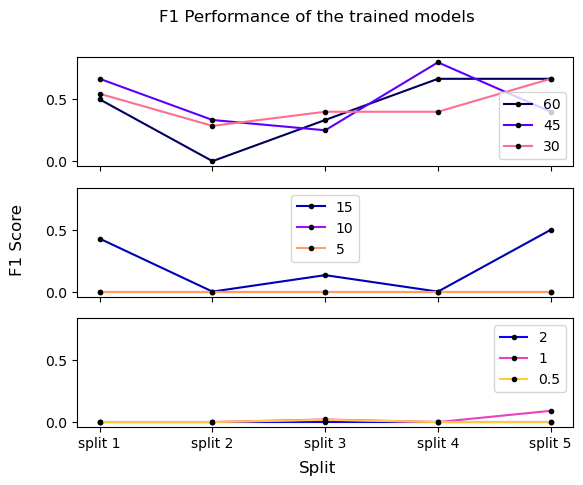

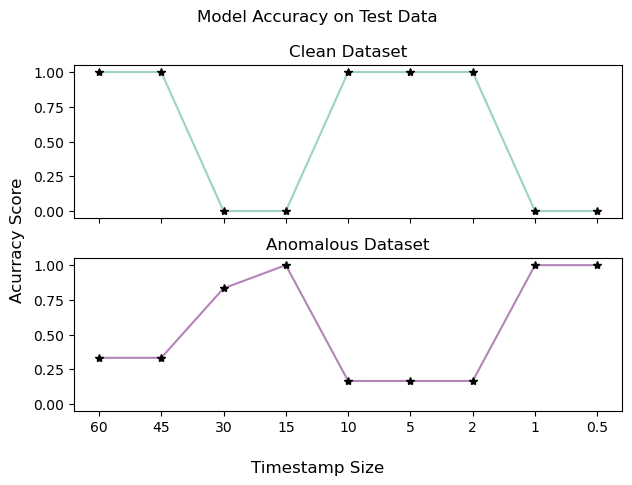

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

results = []
pipelines = []

def generatePipeline():
	pipelines = []
	pipelines.append(('Gaussian', (Pipeline([('GaussianNB', GaussianNB())]))))
	return(pipelines)

results = []
pipelines = []


for i in range(len(x_data)):
	x = x_data[i]
	y = labels[i]
	size = size_times[i]
	
	r, p, n = trainModels(x, y)
	results.append(r)
	pipelines.append(p)
	
f1s = []
for result in results:
	f1s.append(result[0]['test_f1'])

x =  [1, 2, 3, 4, 5]
xLabels = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5']

fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].plot(x, f1s[0], color=color1[1], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].legend(size_times[:3])
axs[1].legend(size_times[3:6])
axs[2].legend(size_times[6:])
plt.xticks(x, xLabels)

fig.suptitle('F1 Performance of the trained models')
fig.supxlabel("Split")
fig.supylabel("F1 Score")


cleanScores = []
anomalyScores = []

for model in pipelines:
		ypredClean = model[0].predict(clx60)
		ypredAnomaly = model[0].predict(atx60)

		cleanScores.append(accuracy_score(cly60, ypredClean))
		anomalyScores.append(accuracy_score(aty60, ypredAnomaly))


fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Model Accuracy on Test Data')
axs[0].plot(x_axis, cleanScores, label='clean test data', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
axs[1].plot(x_axis, anomalyScores, label='abnormal test data', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)

fig.supxlabel('Timestamp Size')
fig.supylabel('Acurracy Score')
# Defining the title of the plot
axs[0].set_title("Clean Dataset")
axs[1].set_title('Anomalous Dataset')

plt.xticks(x_axis, size_times)

fig.tight_layout()
# Displaying the plot
plt.show()

# Results using Alternative Training Data


In [34]:
trainFile = rdpcap('data/timestamps/training52Minutes.pcapng')
labelFile = fm.toList('data/timestamps/training52MinutesPOLISHEDClass.txt') # generate target list

cleanTestFile = rdpcap('data/timestamps/cleanTest.pcapng')
cleanTestLabelFile = fm.toList('data/timestamps/cleanTestClass.txt')

testFile = rdpcap('data/timestamps/anomaliesTest.pcapng')
testLabelFile = fm.toList('data/timestamps/anomaliesTestClass.txt')

gen_times = []

s = time.process_time()
x60s, y60s = dp.timestamps(trainFile, labelFile, 60)
gen_times.append(time.process_time() - s)
s = time.process_time()

x45s, y45s = dp.timestamps(trainFile, labelFile, 45)
gen_times.append(time.process_time() - s)
s = time.process_time()

x30s, y30s = dp.timestamps(trainFile, labelFile, 30)
gen_times.append(time.process_time() - s)
s = time.process_time()

x15s, y15s = dp.timestamps(trainFile, labelFile, 15)
gen_times.append(time.process_time() - s)
s = time.process_time()

x10s, y10s = dp.timestamps(trainFile, labelFile, 10)
gen_times.append(time.process_time() - s)
s = time.process_time()

x5s, y5s = dp.timestamps(trainFile, labelFile, 5)
gen_times.append(time.process_time() - s)
s = time.process_time()

x2s, y2s = dp.timestamps(trainFile, labelFile, 2)
gen_times.append(time.process_time() - s)
s = time.process_time()

x1s, y1s = dp.timestamps(trainFile, labelFile, 1)
gen_times.append(time.process_time() - s)
s = time.process_time()

xhalfs, yhalfs = dp.timestamps(trainFile, labelFile, 0.5)
gen_times.append(time.process_time() - s)
s = time.process_time()

335290
335290
335290
335290
335290
335290
335290
335290
335290


In [35]:

clx60, cly60  = dp.timestamps(cleanTestFile, cleanTestLabelFile, 60)
clx30, cly30  = dp.timestamps(cleanTestFile, cleanTestLabelFile, 30)
clx10, cly10  = dp.timestamps(cleanTestFile, cleanTestLabelFile, 10)
clx5, cly5  = dp.timestamps(cleanTestFile, cleanTestLabelFile,5)


atx60, aty60  = dp.timestamps(testFile, testLabelFile, 60)
atx30, aty30  = dp.timestamps(testFile, testLabelFile, 30)
atx10, aty10  = dp.timestamps(testFile, testLabelFile, 10)
atx5, aty5  = dp.timestamps(testFile, testLabelFile,5)

17950
17950
17950
17950
13224
13224
13224
13224


In [36]:
labels = [y60s, y45s, y30s, y15s, y10s, y5s, y2s, y1s, yhalfs]

x_data = [x60s, x45s, x30s, x15s, x10s, x5s, x2s, x1s, xhalfs]

normal = []
abnormal = []
for item in labels:
	n, a = gp.class_balance_binary(item)
	normal.append(n)
	abnormal.append(a)

## Balance Plots

#### Generation Times

[1, 2, 3, 4, 5, 6, 7, 8, 9]


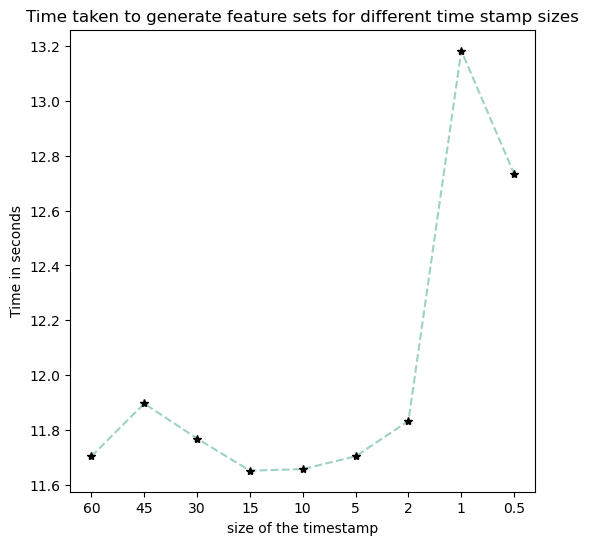

In [37]:
size_times = [60, 45, 30, 15, 10, 5, 2, 1, 0.5]
x_axis = np.arange(1, len(size_times)+1).tolist()
print(x_axis)
fig = plt.figure(figsize=(6, 6))
# Create an axes object
ax = plt.axes()
# Plotting the figure
plt.plot(x_axis, gen_times, color="#9DD1C7", ls='--', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
# Defining the label along the x-axis
plt.xlabel("size of the timestamp")
# Defining the label along the y-axis
plt.ylabel("Time in seconds")
# Defining the title of the plot
plt.title("Time taken to generate feature sets for different time stamp sizes")
plt.xticks(x_axis, size_times)
# Displaying the plot
plt.show()

#### Class Imbalance at timestamp sizes

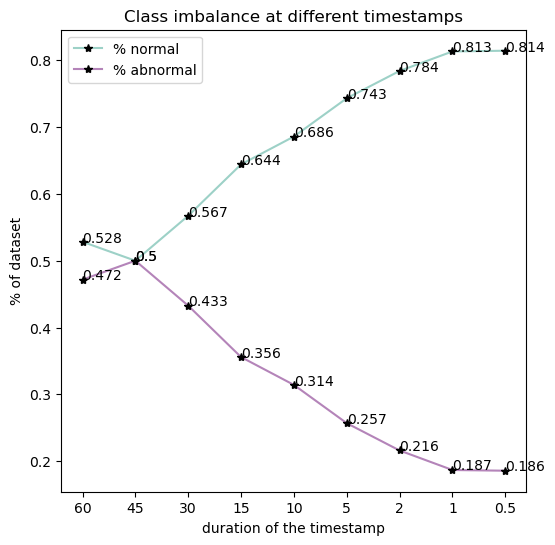

In [38]:
fig = plt.figure(figsize=(6,6))
# Create an axes object
ax = plt.axes()
# Plotting the figure
plt.plot(x_axis, normal, label='% normal', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
plt.plot(x_axis, abnormal, label='% abnormal', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
# Defining the label along the x-axis
plt.xlabel("duration of the timestamp")
# Defining the label along the y-axis
plt.ylabel("% of dataset")
# Defining the title of the plot
plt.title("Class imbalance at different timestamps")

n, a = [], []

for i in range(len(normal)):
	n.append(round(normal[i], 3))
	
	a.append(round(abnormal[i], 3))

normal = n
abnormal = a

for i in range(len(normal)):
	ax.text(x_axis[i], normal[i], normal[i], size=10)
	ax.text(x_axis[i], abnormal[i], abnormal[i], size=10)
#plt.xticks(size_times, rotation=45)
plt.xticks(x_axis, size_times)
ax.legend()
# Displaying the plot
plt.show()

#### Training data size


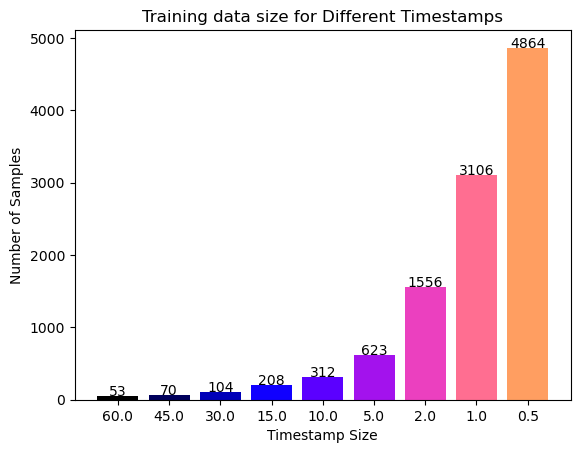

In [39]:
training_size = []


for x in x_data:
	training_size.append(len(x))

def addlabels(x,y):
    for i in range(0, 9):
        plt.text(i+1, y[i], y[i], ha = 'center')

plt.bar(x_axis, training_size, color=color1, tick_label=size_times)

plt.xlabel('Timestamp Size')
plt.ylabel('Number of Samples')
plt.title("Training data size for Different Timestamps")
addlabels(x_axis, training_size)
fig.tight_layout()

## Decision Tree Performance

In [40]:
import json
def generatePipeline():
	pipelines = []
	#pipelines.append(('SGDC', (Pipeline([('SGDC', SGDClassifier())]))))
	pipelines.append(('DecisionTree', (Pipeline([('DecisionTree', DecisionTreeClassifier())]))))
	return(pipelines)

def trainModels(X,Y,k=5):
	pipelines = generatePipeline()
	models = []
	results = []
	names = []

	for pipe, model in pipelines:
		filecomposed = 'model_parameters/' + str(pipe)  + '.json'
		print(filecomposed + '\n\n')
		if os.path.isfile(filecomposed):
			f = open(filecomposed)
			print('opened file')
			params = json.load(f)
			print('loaded parameters')
			f.close()

			clf = RandomizedSearchCV(estimator=model, param_distributions=params, cv=k)
			search = clf.fit(X, Y)
			kfold = KFold(n_splits=k)
		
			crossv_results =  cross_validate(search.best_estimator_, X, Y, cv=kfold, scoring=['balanced_accuracy',
						 'f1', 'precision', 'recall'])

			results.append(crossv_results)
			models.append(search.best_estimator_)
		
	return(results, models, names)

results = []
pipelines = []
for i in range(len(x_data)):
	x = x_data[i]
	y = labels[i]
	size = size_times[i]
	
	r, p, n = trainModels(x, y)
	results.append(r)
	pipelines.append(p)



model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters
model_parameters/DecisionTree.json


opened file
loaded parameters


#### F1 at different training stamps

Text(0.02, 0.5, 'F1 Score')

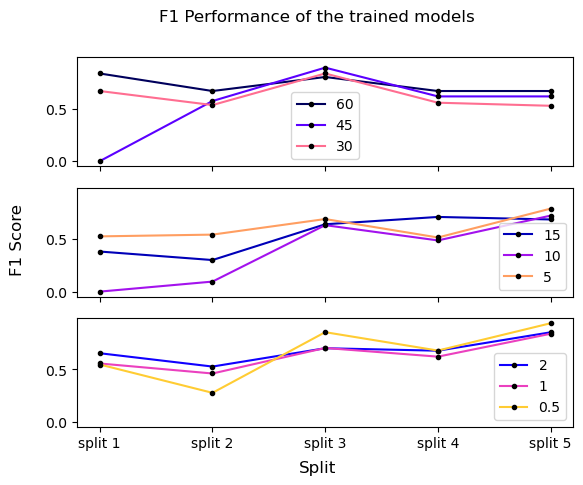

In [41]:
f1s = []
for result in results:
	f1s.append(result[0]['test_f1'])

x =  [1, 2, 3, 4, 5]
xLabels = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5']

fig, axs = plt.subplots(3, sharex=True, sharey=True)

axs[0].plot(x, f1s[0], color=color1[1], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[1], color=color1[4], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].plot(x, f1s[2], color=color1[7], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[3], color=color1[2], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[4], color=color1[5], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[1].plot(x, f1s[5], color=color1[8], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[6], color=color1[3], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[7], color=color1[6], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[2].plot(x, f1s[8], color=color1[9], ls='-', marker='.', markeredgecolor='k', markerfacecolor='k')
axs[0].legend(size_times[:3])
axs[1].legend(size_times[3:6])
axs[2].legend(size_times[6:])
plt.xticks(x, xLabels)

fig.suptitle('F1 Performance of the trained models')
fig.supxlabel("Split")
fig.supylabel("F1 Score")

#### Accuracy and Recall on test

0.0


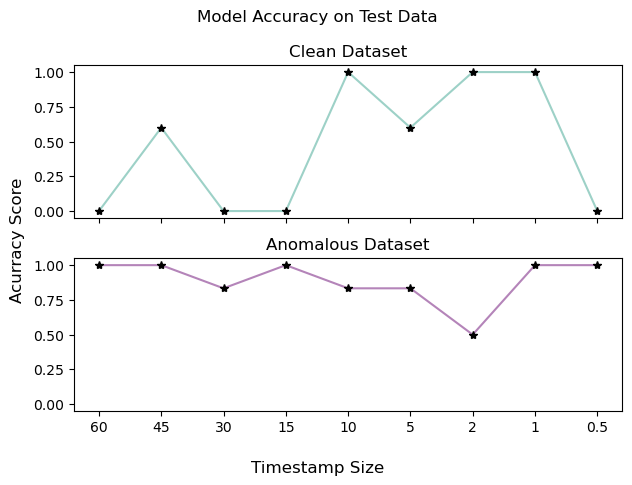

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cleanScoresDT = []
anomalyScoresDT = []

for model in pipelines:
		ypredClean = model[0].predict(clx60)
		ypredAnomaly = model[0].predict(atx60)

		cleanScoresDT.append(accuracy_score(cly60, ypredClean))
		anomalyScoresDT.append(accuracy_score(aty60, ypredAnomaly))

print(cleanScoresDT[0])

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Model Accuracy on Test Data')
axs[0].plot(x_axis, cleanScoresDT, label='clean test data', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
axs[1].plot(x_axis, anomalyScoresDT, label='abnormal test data', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)

fig.supxlabel('Timestamp Size')
fig.supylabel('Acurracy Score')
# Defining the title of the plot
axs[0].set_title("Clean Dataset")
axs[1].set_title('Anomalous Dataset')

plt.xticks(x_axis, size_times)

fig.tight_layout()
# Displaying the plot
plt.show()


0.0


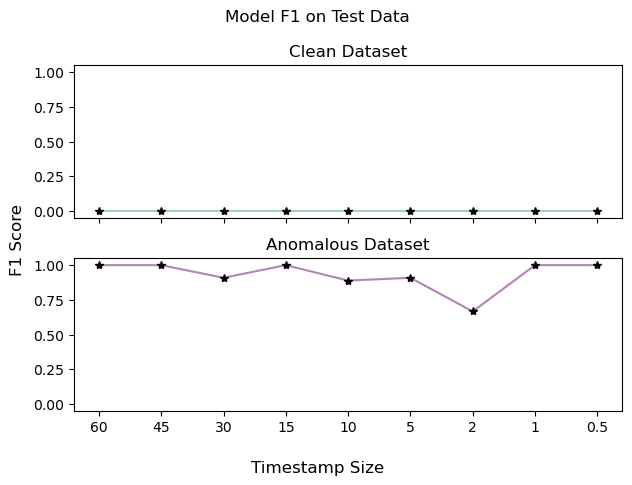

In [43]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cleanScoresDT = []
anomalyScoresDT = []

for model in pipelines:
		ypredClean = model[0].predict(clx60)
		ypredAnomaly = model[0].predict(atx60)

		cleanScoresDT.append(f1_score(cly60, ypredClean))
		anomalyScoresDT.append(f1_score(aty60, ypredAnomaly))

print(cleanScoresDT[0])

fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Model F1 on Test Data')
axs[0].plot(x_axis, cleanScoresDT, label='clean test data', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
axs[1].plot(x_axis, anomalyScoresDT, label='abnormal test data', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)

fig.supxlabel('Timestamp Size')
fig.supylabel('F1 Score')
# Defining the title of the plot
axs[0].set_title("Clean Dataset")
axs[1].set_title('Anomalous Dataset')

plt.xticks(x_axis, size_times)

fig.tight_layout()
# Displaying the plot
plt.show()
